In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# Importing the libraries needed
import numpy as np #numirical analysis
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import BatchNormalization,Dropout,Dense
from sklearn.model_selection import train_test_split

In [ ]:
#load the file
srd1=pd.read_csv("sensor_readings_24.csv")

EDD

In [ ]:
srd1.head(5)

,0.438,0.498,3.625,3.645,5.000,2.918,5.000.1,2.351,2.332,2.643,1.698,1.687,1.698.1,1.717,1.744,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
0,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,1.695,1.687,1.695,1.720,1.744,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,1.696,1.687,1.695,1.717,1.744,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
2,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,1.730,1.687,1.695,1.717,1.744,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
3,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,1.696,1.687,1.695,1.717,1.744,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
4,0.439,0.498,3.626,3.629,5.0,2.918,5.0,2.633,2.334,2.645,1.705,1.686,1.694,1.719,1.744,0.589,0.502,0.493,0.504,0.446,0.431,0.444,0.444,0.430,Slight-Right-Turn


In [ ]:
srd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5455 entries, 0 to 5454
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   0.438              5455 non-null   float64
 1   0.498              5455 non-null   float64
 2   3.625              5455 non-null   float64
 3   3.645              5455 non-null   float64
 4   5.000              5455 non-null   float64
 5   2.918              5455 non-null   float64
 6   5.000.1            5455 non-null   float64
 7   2.351              5455 non-null   float64
 8   2.332              5455 non-null   float64
 9   2.643              5455 non-null   float64
 10  1.698              5455 non-null   float64
 11  1.687              5455 non-null   float64
 12  1.698.1            5455 non-null   float64
 13  1.717              5455 non-null   float64
 14  1.744              5455 non-null   float64
 15  0.593              5455 non-null   float64
 16  0.502              5455 

In [ ]:
srd1.describe()

,0.438,0.498,3.625,3.645,5.000,2.918,5.000.1,2.351,2.332,2.643,1.698,1.687,1.698.1,1.717,1.744,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429
count,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.00000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000
mean,1.471807,2.327378,2.489139,2.796346,2.958178,2.893068,3.350811,2.540431,3.125767,2.832421,2.549554,2.077848,2.125856,2.190573,2.205857,1.202223,0.989921,0.91035,1.058212,1.076436,1.016030,1.778279,1.555250,1.578719
std,0.802753,1.410058,1.247454,1.309438,1.339062,1.282693,1.413645,1.111653,1.357047,1.307960,1.382107,1.249404,1.407285,1.577004,1.715580,1.098638,0.942138,0.88959,1.144711,1.141570,0.887485,1.571726,1.291478,1.150480
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,0.783000,0.778000,0.770000,0.756000,0.495000,0.424000,0.373000,0.35400,0.340000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.921000,1.362000,1.538500,1.731000,1.774000,1.785500,1.930500,1.618000,1.799500,1.636000,1.579000,1.293000,1.190500,1.031000,0.860000,0.690500,0.581000,0.53000,0.523500,0.542000,0.567000,0.743000,0.792000,0.884000
50%,1.335000,1.905000,2.064000,2.457000,2.667000,2.682000,3.225000,2.171000,2.802000,2.679000,2.000000,1.689000,1.609000,1.493000,1.328000,0.803000,0.738000,0.68500,0.691000,0.693000,0.764000,1.031000,1.071000,1.289000
75%,1.814000,2.683000,2.739000,4.094000,4.314000,3.835500,5.000000,3.193000,5.000000,3.526500,3.217500,2.283000,2.358500,2.739500,4.436500,1.159000,0.913000,0.83700,0.857000,0.863000,1.002500,2.068500,1.560000,1.657500
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,5.019000,5.000000,5.003000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Rename the column

In [ ]:

srd1=srd1.rename(columns={"0.438": "A", "0.498" : "B","3.625":"C","3.645":"D",'5.000':"E", '2.918':"F", '5.000.1':"G", '2.351':"H", '2.332':"I",
       '2.643':"J", '1.698':"K", '1.687':"L", '1.698.1':"M", '1.717':"N", '1.744':"O", '0.593':"P",
       '0.502':"Q", '0.493':"R", '0.504':"S", '0.445':"T", '0.431':"U", '0.444':"V", '0.440':"W", '0.429':"X",

       'Slight-Right-Turn':"label"})

In [ ]:
srd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5455 entries, 0 to 5454
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       5455 non-null   float64
 1   B       5455 non-null   float64
 2   C       5455 non-null   float64
 3   D       5455 non-null   float64
 4   E       5455 non-null   float64
 5   F       5455 non-null   float64
 6   G       5455 non-null   float64
 7   H       5455 non-null   float64
 8   I       5455 non-null   float64
 9   J       5455 non-null   float64
 10  K       5455 non-null   float64
 11  L       5455 non-null   float64
 12  M       5455 non-null   float64
 13  N       5455 non-null   float64
 14  O       5455 non-null   float64
 15  P       5455 non-null   float64
 16  Q       5455 non-null   float64
 17  R       5455 non-null   float64
 18  S       5455 non-null   float64
 19  T       5455 non-null   float64
 20  U       5455 non-null   float64
 21  V       5455 non-null   float64
 22  

In [ ]:
srd1.columns  # displayed all column names

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'label'],
      dtype='object')

visualization of label 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


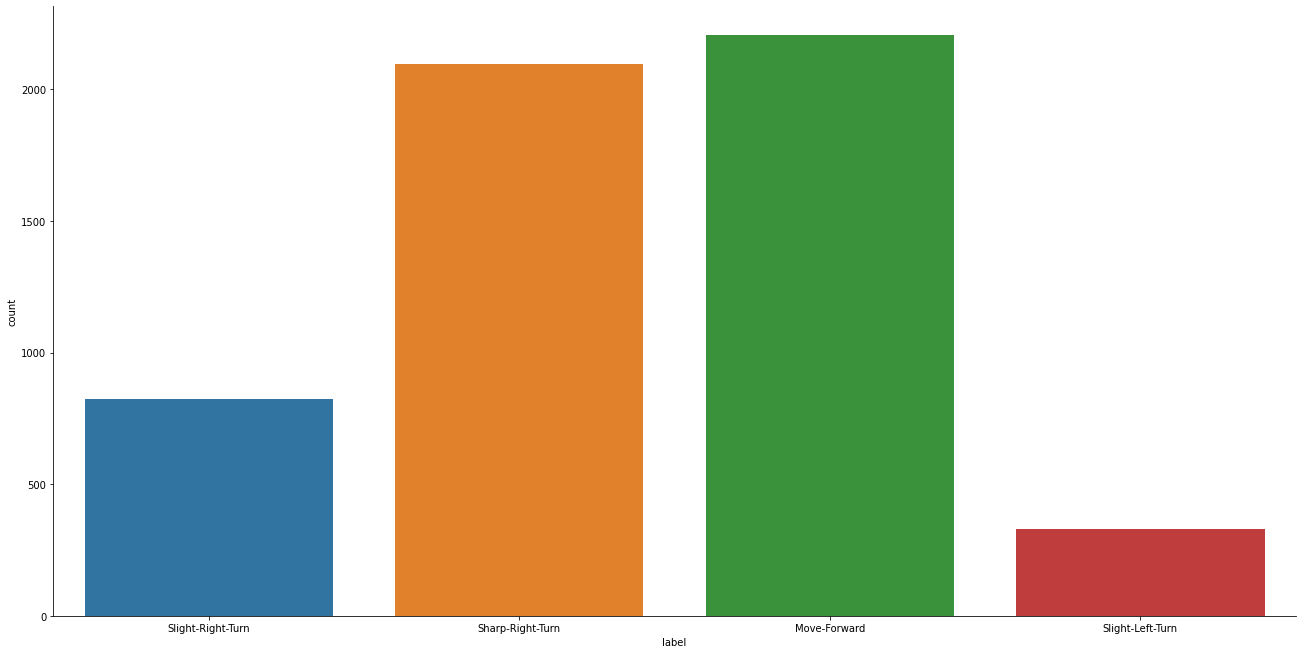

In [ ]:
import seaborn as sns
sns.catplot("label",data=srd1, kind="count", height=9,aspect=2.0)# Imbalanced dataset



DATA PREPROCESSING

LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
srd1['label']=le.fit_transform(srd1['label'])

In [ ]:
srd1['label'].value_counts()

0    2205
1    2097
3     825
2     328
Name: label, dtype: int64

In [ ]:

srd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5455 entries, 0 to 5454
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       5455 non-null   float64
 1   B       5455 non-null   float64
 2   C       5455 non-null   float64
 3   D       5455 non-null   float64
 4   E       5455 non-null   float64
 5   F       5455 non-null   float64
 6   G       5455 non-null   float64
 7   H       5455 non-null   float64
 8   I       5455 non-null   float64
 9   J       5455 non-null   float64
 10  K       5455 non-null   float64
 11  L       5455 non-null   float64
 12  M       5455 non-null   float64
 13  N       5455 non-null   float64
 14  O       5455 non-null   float64
 15  P       5455 non-null   float64
 16  Q       5455 non-null   float64
 17  R       5455 non-null   float64
 18  S       5455 non-null   float64
 19  T       5455 non-null   float64
 20  U       5455 non-null   float64
 21  V       5455 non-null   float64
 22  

Correlation

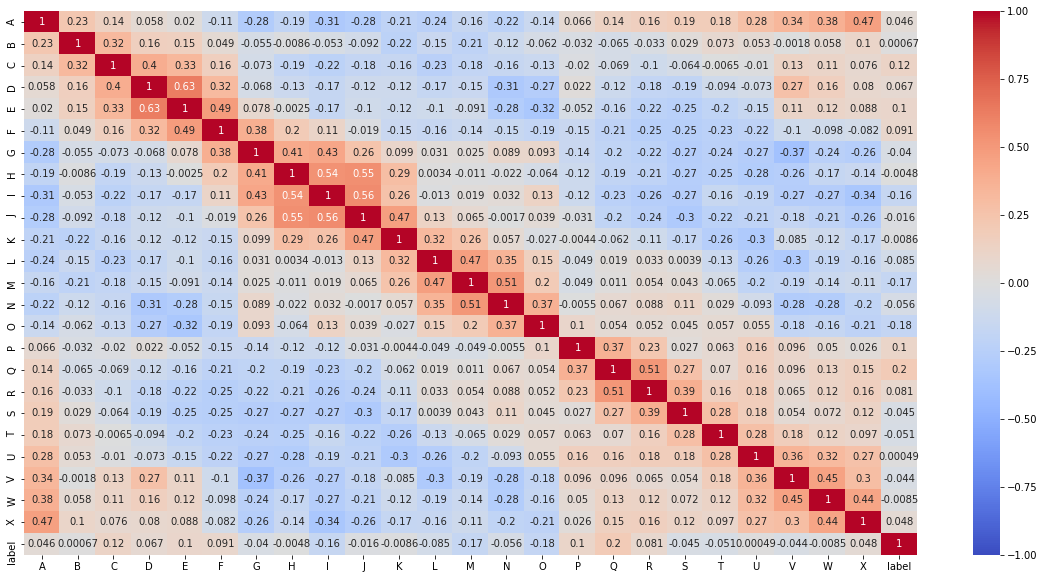

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(srd1.corr(),annot=True,vmax=1,vmin=-1,cmap='coolwarm')

To check missing values

In [ ]:
srd1.isnull().sum()# no null values

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
P        0
Q        0
R        0
S        0
T        0
U        0
V        0
W        0
X        0
label    0
dtype: int64

splitting x and y

In [ ]:
x=srd1.drop('label',axis=1)
y=srd1['label']

Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
X=norm.fit_transform(x)


In [ ]:
X.mean()

0.3309702009435295

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.20)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4364, 24) (1091, 24) (4364,) (1091,)


Balancing the dataset

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE("minority")
x_train1,y_train1=smote.fit_sample(x_train,y_train)
print(x_train1.shape,y_train1.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


(5851, 24) (5851,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#to build the model
model=Sequential()

ANN

In [ ]:
#input layer
model.add(Dense(32,input_shape=(24,)))

#hidden layer
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))

#output layer
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train1,y_train1,batch_size=100,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
59/59 [==============================] - 1s 11ms/step - loss: 1.3076 - accuracy: 0.3413 - val_loss: 1.0858 - val_accuracy: 0.5527
Epoch 2/20
59/59 [==============================] - 0s 2ms/step - loss: 0.8515 - accuracy: 0.6734 - val_loss: 0.8801 - val_accuracy: 0.6425
Epoch 3/20
59/59 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.7182 - val_loss: 0.7553 - val_accuracy: 0.6829
Epoch 4/20
59/59 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.7582 - val_loss: 0.6707 - val_accuracy: 0.7324
Epoch 5/20
59/59 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7938 - val_loss: 0.6249 - val_accuracy: 0.7489
Epoch 6/20
59/59 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.8173 - val_loss: 0.6285 - val_accuracy: 0.7690
Epoch 7/20
59/59 [==============================] - 0s 3ms/step - loss: 0.4484 - accuracy: 0.8279 - val_loss: 0.5438 - val_accuracy: 0.7993
Epoch 8/20
59/59 [=

MODEL EVALUATE

In [ ]:
model.evaluate(x_test, y_test)

35/35 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.8708


[0.35209226608276367, 0.8707607984542847]